# <center> Qual o impacto do gasto público no nº de mortes dos municípios brasileiros? </center>
## <center> Econometria I - EAE0324 </center>
### <center> Julho 2022 </center>
#### <center> Vitor Baldoino </center>

***

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_palette(sns.dark_palette("#2EA3C5", reverse=True, n_colors=20))
plt.style.use(['seaborn-paper'])
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('dados/base_trab_final.csv')
df.head()

,ano,sigla_uf,id_municipio,numero_obitos,tempo_medio_emprego,qtd_pessoas_cidade_uf,qtd_brancos_cidade_uf,qtd_negros_cidade_uf,qtd_indigena_cidade_uf,qtd_amarelos_cidade_uf,quantidade_estabelecimentos_ensino_infantil,quantidade_estabelecimentos_ensino_fundamental,quantidade_estabelecimentos_ensino_medio,seguranca,assistencia,previdencia,despesa_total,taxa_abandono_ef,taxa_reprovacao_ef,taxa_aprovacao_ef,taxa_abandono_em,taxa_reprovacao_em,taxa_aprovacao_em,atu_ei,atu_ef,atu_em,populacao,log_populacao,log_obitos,log_despesa,log_seguranca,log_assistencia,log_previdencia,obitos_pc,despesa_pc,seguranca_pc,assistencia_pc,previdencia_pc,maioria_nao_branca_cidade_uf,regiao,norte,nordeste,sudeste,sul,centro,pop_quantile
0,2019,AC,1200013,48,10.771429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,6253910.00,0.0,2.724452e+08,1.491667,3.441667,95.066667,13.233333,14.033333,72.733333,14.066667,26.658333,27.733333,15256.0,9.632728,3.891820,19.422948,0.000000,15.648718,0.000000,0.003146,17858.230874,0.000000,409.931175,0.000000,0,Norte,1,0,0,0,0,C
1,2019,AC,1200054,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,7852964.62,0.0,2.099017e+08,4.825000,7.825000,87.350000,6.333333,6.800000,86.866667,13.172727,18.491667,23.633333,7417.0,8.911530,3.737670,19.162150,0.000000,15.876402,0.000000,0.005528,28300.087438,0.000000,1058.779105,0.000000,0,Norte,1,0,0,0,0,B
2,2019,AC,1200104,148,4.959184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,12911431.04,871082.1,5.789614e+08,1.266667,2.583333,96.150000,3.566667,2.466667,93.966667,19.600000,24.158333,30.533333,26278.0,10.176487,5.003946,20.176746,0.000000,16.373624,13.677493,0.005632,22032.170992,0.000000,491.339944,33.148721,0,Norte,1,0,0,0,0,D
3,2019,AC,1200138,42,5.550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.233333,2.375000,93.391667,5.766667,4.066667,90.166667,18.166667,20.725000,19.133333,10266.0,9.236593,3.761200,NaN,NaN,NaN,NaN,0.004091,NaN,NaN,NaN,NaN,0,Norte,1,0,0,0,0,B
4,2019,AC,1200179,46,5.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1340412.96,6125244.78,0.0,2.398449e+08,3.825000,9.000000,87.175000,10.066667,4.300000,85.633333,18.233333,24.033333,24.566667,11733.0,9.370161,3.850148,19.295503,14.108489,15.627929,0.000000,0.003921,20441.908374,114.242986,522.052738,0.000000,0,Norte,1,0,0,0,0,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 46 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ano                                             5570 non-null   int64  
 1   sigla_uf                                        5570 non-null   object 
 2   id_municipio                                    5570 non-null   int64  
 3   numero_obitos                                   5570 non-null   int64  
 4   tempo_medio_emprego                             4719 non-null   float64
 5   qtd_pessoas_cidade_uf                           4290 non-null   float64
 6   qtd_brancos_cidade_uf                           4290 non-null   float64
 7   qtd_negros_cidade_uf                            4290 non-null   float64
 8   qtd_indigena_cidade_uf                          4290 non-null   float64
 9   qtd_amarelos_cidade_uf                   

Este trabalho visa entender como algumas variáveis econômicas impactam o número de óbitos de cidades brasileiras. Para tal, é utilizada uma *cross-section* de municípios que contém a variável explicada, o número de óbitos, e possíveis variáveis explicativas, como as despesas orçamentárias do município, população total, região geográfica e indicadores educacionais. Esse trabalho foi inspirado pelo artigo [*US mortality by economic, demographic, and social characteristics: the National Longitudinal Mortality Study*](https://ajph.aphapublications.org/doi/epdf/10.2105/AJPH.85.7.949) de Sorlie, Backlund e Keller, publicado no *American Journal of Public Health* em 1995.

## Descrição dos Dados

***

A base utilizada neste trabalho é de elaboração própria, as bases brutas usadas para aquisição dos dados podem ser obtidas através do portal [*Base dos Dados*](https://basedosdados.org/) (a lista completa das bases utilizadas se encontra nas referências). Adicionalmente, os *scripts* utilizados para o tratamento, agregação e modelagem dos dados podem ser encontrados em [Perfil de Vitor Baldoino - *GitHub*](https://github.com/baldoinov/econometria-i).

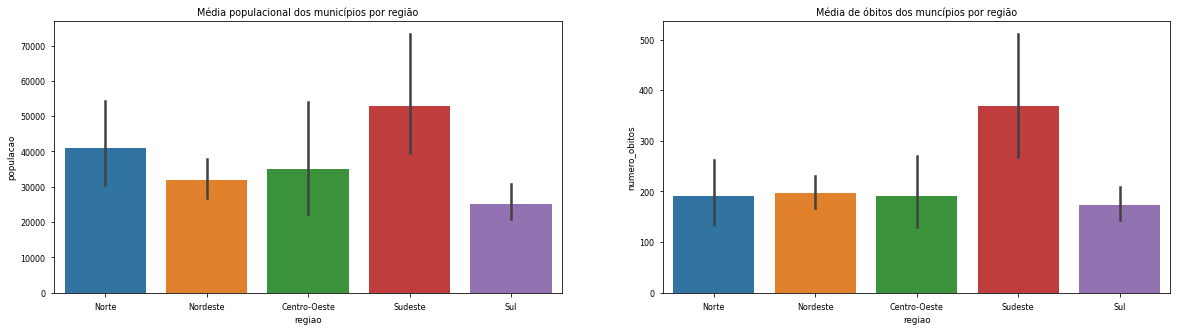

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# sns.histplot(x='populacao', data=df, hue='regiao', ax=axes[0])
sns.barplot(x='regiao', y='populacao', estimator=np.mean, data=df, ax=axes[0])
axes[0].set_title('Média populacional dos municípios por região')

sns.barplot(x='regiao', y='numero_obitos', estimator=np.mean, data=df, ax=axes[1])
axes[1].set_title('Média de óbitos dos muncípios por região')


plt.show()

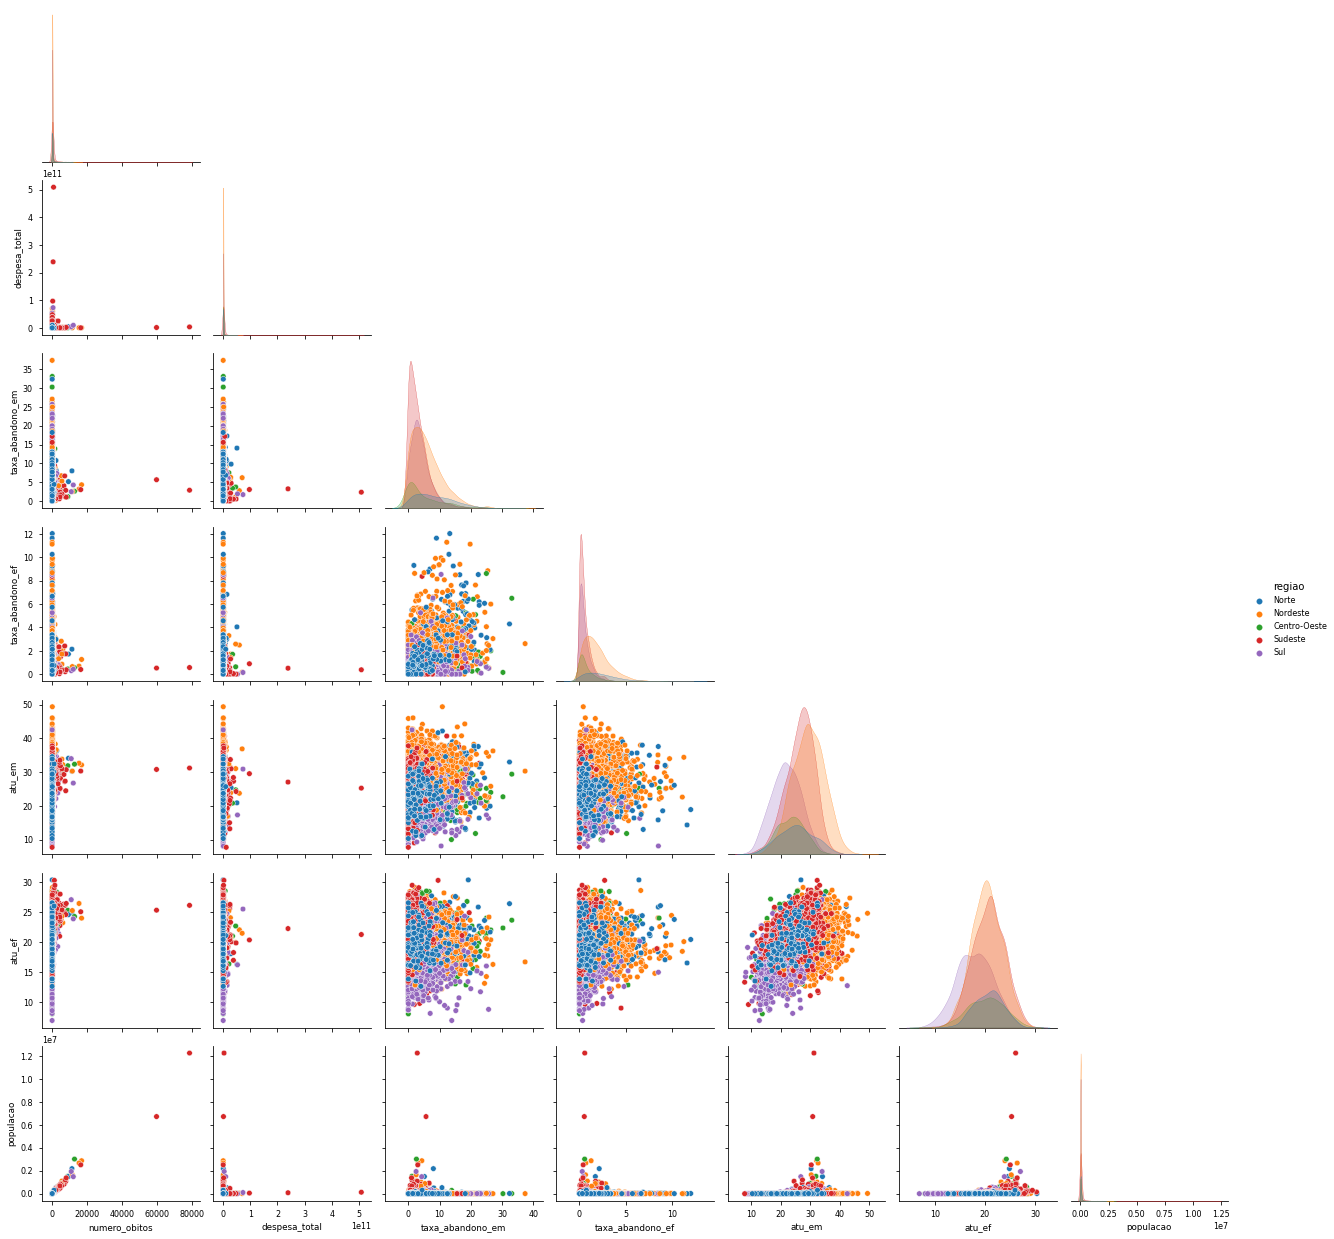

In [6]:
pairs = df[['numero_obitos', 'despesa_total', 'taxa_abandono_em', 'taxa_abandono_ef', 'atu_em', 'atu_ef', 'populacao', 'regiao']]
sns.pairplot(pairs, hue='regiao', corner=True)
plt.show()

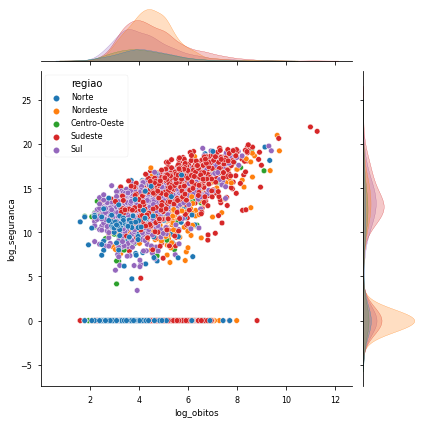

In [7]:
sns.jointplot(data=df, x="log_obitos", y="log_seguranca", hue='regiao')

plt.show()

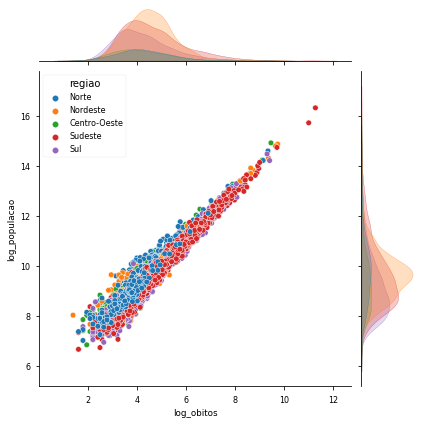

In [8]:
sns.jointplot(data=df, x="log_obitos", y="log_populacao", hue='regiao')

plt.show()

Como apresentado no gráfico da esquerda, os municípios de todas as regiões apresentam uma associação positiva entre o *log* do número de óbitos e o *log* da despesa total em segurança, isto é contra-intuitivo, visto que se espera que o gráfico apresente relação negativa. Essa contradição será melhor explorada nos modelos de regressão.

No gráfico da direita, está a associação entre os *logs* do número de óbitos e da população. Um fato interessante no gráfico de distribuição superior é que o *log* do número de óbitos da região nordeste, comparado às outras regiões, concentra-se em um nível ligeiramente maior e possui menor variância.

## Modelos de Regressão

***

A abordagem para estimar o impacto de variáveis econômicas no número de óbitos de um município consiste em estimar três modelos:

$$log(\text{mortes}) = \beta_0 + \beta_1 log(\text{Pop}) + \beta_2 \text{Emprego} + \beta_3 log(\text{Despesa}) + \beta_4 \text{Evasão-EM} + \beta_5 \text{Nordeste} + u_i$$

$$log(\text{mortes}) = \beta_0 + \beta_1 log(\text{Pop}) + \beta_2\text{Emprego} + \beta_3 log(\text{Seg}) + \beta_4\text{Evasão-EM} + \beta_5\text{Nordeste} + u_i$$

$$log(\text{mortes}) = \beta_0 + \beta_1 log(\text{Pop}) + \beta_2 \text{Emprego} + \beta_{i, i = \{3, 4, 5\} } log(\text{Despesas}) + \beta_{i, i = \{6, 7\} } \text{Educação} + \beta_8\text{Nordeste} + u_i$$

Nestes modelos, as variáveis "``log(Pop)``", "``Emprego``", "``Evasão-EM``" representam o *log* da população, o tempo médio que um trabalhador permance empregado e a taxa de evasão do ensino médio de cada município, respectivamente. A variável "``Nordeste``" é uma *dummy* que assume o valor 1 se a cidade observada é na região nordeste do país e 0 caso contrário. Espera-se que as variáveis "``log(Pop)``" e "``Evasão-EM``" possuam um sinal positivo, a primeira porque é natural que municípios maiores apresentem um maior número de óbitos e a última para refletir a intuição de que uma maior evasão escolar está relacionada à um baixo nível de instrução e, consequentemente, a uma qualidade de vida menor e expectativa de vida mais curta. O sinal esperado da variável "``Emprego``" é positivo, relefetindo a ideia de que uma permanência maior em um emprego, na média, tende a aumentar a qualidade de vida de um trabalhador e, portanto, diminuir as chances de óbito.

No primeiro e segundo modelo, as variáveis "``log(Despesa)``" e "``log(Seg)``" são o *log* da despesa orçamentária total do município e o *log* do gasto em segurança público do município, respectivamente. No terceiro modelo, a variável representada como "``log(Despesas)``" contém o *log* da despesa orçamentária do município com segurança, assistência social e previdência. Esses gastos foram isolados e representados separadamente por se pensar que eles sejam mais importante para explicar o número de óbitos da cidade. Adicionalmente, espera-se que o sinal das variáveis de despesas orçamentárias seja negativo em todos os modelos, intuitivamente, esse sinal captaria a ideia que um gasto público maior tem a capacidade de aumentar o bem-estar geral e diminuir o número de óbitos do município.

No terceiro e último modelo, o componente "``Educação``" e seus subscritos indicam a variável "``Evasão-EM``", presente nos modelos anteriores, e a variável "``Aluno/Turma-EM``", que é a média de alunos por turma para aquele município. Essas variáveis foram condensadas no componente "``Educação``" para poupar espaço. Assim como nos outros modelos que possuem indicadores relacionados à educação, o sinal esperado dessas variáveis é positivo, transmitindo a ideia de que a piora nos indicadores educacionais aumente o número de óbitos.

### Modelo 01

$$log(\text{mortes}) = \beta_0 + \beta_1 log(\text{Pop}) + \beta_2 \text{Emprego} + \beta_3 log(\text{Despesa}) + \beta_4 \text{Evasão-EM} + \beta_5 \text{Nordeste} + u_i$$

In [9]:
df1 = df[['log_obitos', 'log_populacao', 'tempo_medio_emprego', 'log_despesa', 'taxa_abandono_em', 'nordeste']].dropna()

X = df1[['log_populacao', 'tempo_medio_emprego', 'log_despesa', 'taxa_abandono_em', 'nordeste']]
X = sm.add_constant(X)

Y = df1['log_obitos']

model1 = sm.OLS(Y, X, missing='drop')
results1 = model1.fit(cov_type='HC1')

summ1 = results1.summary(title='Modelo 01')

summ1_slim = results1.summary(title='Modelo 01', slim=True)

print(summ1)

                                  Modelo 01                                   
Dep. Variable:             log_obitos   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.534e+04
Date:                Thu, 14 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:18:54   Log-Likelihood:                -663.95
No. Observations:                4685   AIC:                             1340.
Df Residuals:                    4679   BIC:                             1379.
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.5198    

### Modelo 02

$$log(\text{mortes}) = \beta_0 + \beta_1 log(\text{Pop}) + \beta_2\text{Emprego} + \beta_3 log(\text{Seg}) + \beta_4\text{Evasão-EM} + \beta_5\text{Nordeste} + u_i$$

In [10]:
df2 = df[['log_obitos', 'log_populacao', 'tempo_medio_emprego', 'log_seguranca', 'taxa_abandono_em', 'nordeste']].dropna()

X = df2[['log_populacao', 'tempo_medio_emprego', 'log_seguranca', 'taxa_abandono_em', 'nordeste']]
X = sm.add_constant(X)

Y = df2['log_obitos']

model2 = sm.OLS(Y, X, missing='drop')
results2 = model2.fit(cov_type='HC1')

summ2 = results2.summary(title='Modelo 02')

summ2_slim = results2.summary(title='Modelo 02', slim=True)

print(summ2)

                                  Modelo 02                                   
Dep. Variable:             log_obitos   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.540e+04
Date:                Thu, 14 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:18:54   Log-Likelihood:                -646.96
No. Observations:                4685   AIC:                             1306.
Df Residuals:                    4679   BIC:                             1345.
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.4103    

### Modelo 03

$$log(\text{mortes}) = \beta_0 + \beta_1 log(\text{Pop}) + \beta_{i, i = \{2, 3, 4\} } log(\text{Despesas}) + \beta_5\text{(Alu/Turma)} + \beta_6\text{Evasão-EM} + \beta_7\text{Nordeste} + u_i$$

In [11]:
df3 = df[['log_obitos', 'log_populacao', 'tempo_medio_emprego', 'log_seguranca', 'log_assistencia', 'log_previdencia', 'atu_em', 'taxa_abandono_em', 'nordeste']].dropna()

X = df3[['log_populacao', 'tempo_medio_emprego', 'log_seguranca', 'log_assistencia', 'log_previdencia', 'atu_em', 'taxa_abandono_em', 'nordeste']]
X = sm.add_constant(X)

Y = df3['log_obitos']

model3 = sm.OLS(Y, X, missing='drop')
results3 = model3.fit(cov_type='HC1')

summ3 = results3.summary(title='Modelo 03')

summ3_slim = results3.summary(title='Modelo 03', slim=True)

print(summ3)

                                  Modelo 03                                   
Dep. Variable:             log_obitos   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.036e+04
Date:                Thu, 14 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:18:54   Log-Likelihood:                -609.33
No. Observations:                4685   AIC:                             1237.
Df Residuals:                    4676   BIC:                             1295.
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.5053    

In [12]:
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.stattools import jarque_bera
#from statsmodels.stats.diagnostic import het_breuschpagan

summs = summary_col(results=[results1, results2, results3], stars=True,
                    model_names=['Modelo 01', 'Modelo 02', 'Modelo 03'],
                    regressor_order=['const', 'nordeste', 'log_populacao', 'taxa_abandono_em', 'tempo_medio_emprego', 'log_seguranca', 'log_assistencia', 'log_previdencia', 'log_despesa'],
                    info_dict={"N": lambda x: (x.nobs), 
                               "Prob(F-statistic):": lambda x: (x.f_pvalue),
                               "Prob(JB):": lambda x: (jarque_bera(x.resid)[1]),
                               "Covariance type:": lambda x: (x.cov_type)})

print(summs)


                    Modelo 01  Modelo 02  Modelo 03 
----------------------------------------------------
const               -4.5198*** -4.4103*** -4.5053***
                    (0.0849)   (0.0370)   (0.0552)  
nordeste            -0.0515*** -0.0321*** -0.0049   
                    (0.0086)   (0.0095)   (0.0102)  
log_populacao       0.9482***  0.9399***  0.9269*** 
                    (0.0035)   (0.0039)   (0.0056)  
taxa_abandono_em    -0.0143*** -0.0138*** -0.0126***
                    (0.0011)   (0.0011)   (0.0011)  
tempo_medio_emprego 0.0010***  0.0011***  0.0010*** 
                    (0.0002)   (0.0002)   (0.0002)  
log_seguranca                  0.0039***  0.0037*** 
                               (0.0007)   (0.0007)  
log_assistencia                           0.0144*** 
                                          (0.0048)  
log_previdencia                           0.0041*** 
                                          (0.0005)  
log_despesa         0.0032                   

Começando pelo termo de erro, o valor-p do teste de Jarque-Bera indica sucesso ao rejeitar a hipótese nula de que os erros dos modelos seguem uma distribuição normal. Apesar disso, seguiremos com a interpretação geral dos modelos e com o teste de hipóteses.

Os coeficientes reportados para as variáveis "``log(Pop)``" e "``Emprego``" confirmam as nossas suposições feitas *a priori*, indicando que um aumento de 1% na população de uma cidade está associado a um aumento de cerca de 0,9% no número de mortes e que o aumento no tempo médio que um trabalhador fica empregado está associado a uma diminuição de, aproximadamente, 0,1% no número de óbitos. Ambos os resultados são estatisticamente significantes ao nível de 5% em todos os modelos. 

Apesar dos resultados consoantes com a intuição para as variáveis acima, as variáveis "``Evasão-EM``", "``Aluno/Turma-EM``" apresentam um sinal discordante das suposições feitas *a priori*. Para a variável de "``Evasão-EM``", os resultados obtidos reportam que um aumento na taxa de abandono do ensino médio *diminui* a o número de óbitos de um município em cerca de 1,3%, sendo esse resultado estatisticamente significante ao nível de 5%. Analogamente, o coeficiente da variável "``Aluno/Turma-EM``" no terceiro modelo indica que um aumento na média de alunos por turma em uma cidade diminui o número de óbitos em 0,23% e esse resultado também é estatisticamente significante ao nível de 5%. Inicialmente, essa contradição nos coeficientes das variáveis educacionais pode indicar a necessidade de se utilizar um controle para o perfil de renda do município. Isto é, em municípios muito pobres, um par de braço a mais no trabalho - e portanto fora da escola - pode significar um aumento da qualidade de vida e, consequentemente, um aumento na expectativa de vida.

Além dos indicadores educacionais acima, as variáveis orçamentárias "``log(Despesa)``" e "``log(Despesas)``" também contradizem as suposições feitas *a priori*. No primeiro modelo, a variável "``log(Despesa)``" apresentou um sinal positivo, indicando que um aumento de 1% no gasto público total está associado, na média, a um aumento de 0,0032% no número de óbitos, entretanto, esse resultado não é estatisticamente diferente de zero. Os resultados dos dois últimos modelos indicam que um aumento no gasto público em segurança está associado, *ceteris paribus*, a um aumento de aproximadamente 0,0038% no número de óbitos. Semelhantemente, no terceiro modelo, valores de 0,0144% e 0,0041% são reportados para a assistência social e para a previdência. Esses resultados são estatísticamente significantes ao nível de 5%.

A discordância entre as susposições iniciais e os resultados nas variáveis de gasto público apresentam algumas limitações dos modelos estimados. Uma das justificas para os sinais encontrados é a ausência de um controle por perfil etário do município. Intuitivamente, municípios que se encontram na parte superior da pirâmide etária apresentam um gasto com previdência maior sem que isso produza um efeito sob o número de óbitos.

Adicionalmente, a relação entre o número de óbitos e o município estar situado no nordeste, apontada na etapa de descrição dos dados, é significativa para os dois primeiros modelos, mas não da forma que a distribuição dos dados permite inferir. Como indicado na tabela, municípios localizados no nordeste do país possuem um número de óbitos entre 3,2% e 5,15% menor. Para o terceiro modelo, o coeficiente da *dummy* "``Nordeste``" não é estatisticamente diferente de zero.

Por fim, dois comentários: (i) o valor-p das estatísticas F de todos os modelos permite rejeitar a hipótese nula de que as variáveis explicativas, de forma conjunta, são iguais a zero; e (ii) a matriz de variância-covariância utilizada é robusta (HC1)./

## Referências

Sorlie, P. D., Backlund, E., & Keller, J. B. (1995). US mortality by economic, demographic, and social characteristics: the National Longitudinal Mortality Study. American Journal of Public Health, 85(7), 949-956.

Base dos Dados. Sistema de Informações sobre Mortalidade (SIM). Disponível em: <https://basedosdados.org/dataset/br-ms-sim?bdm_table=microdados>. Acesso em: 14 de jul. de 2022.

Base dos Dados. Cadastro Geral de Empregados e Desempregados (CAGED). Disponível em: <https://basedosdados.org/dataset/br-me-caged?bdm_table=microdados_antigos>. Acesso em: 14 de jul. de 2022.

Base dos Dados. Projeto Acesso a Oportunidades. Disponível em: <https://basedosdados.org/dataset/br-ipea-acesso-oportunidades?bdm_table=estatisticas_2019>. Acesso em: 14 de jul. de 2022.

Base dos Dados. Sistema de Informações Contábeis e Fiscais do Setor Público Brasileiro (Siconfi). Disponível em: <https://basedosdados.org/dataset/br-me-siconfi?bdm_table=municipio_despesas_orcamentarias>. Acesso em: 14 de jul. de 2022.

Base dos Dados. Indicadores Educacionais. Disponível em: <https://basedosdados.org/dataset/br-inep-indicadores-educacionais?bdm_table=escola>. Acesso em: 14 de jul. de 2022.

Base dos Dados. População Brasileira. Disponível em: <https://basedosdados.org/dataset/br-ibge-populacao?bdm_table=municipio>. Acesso em: 14 de jul. de 2022.
